In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport
%matplotlib inline

In [135]:
data_df_train = pd.read_csv('train.csv')
data_df_train.drop('id', axis=1, inplace=True)
data_df_train

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


c:\Users\Артем\vscode_source\MLIntro\LinearRegression\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Артем\vscode_source\MLIntro\LinearRegression\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Артем\vscode_source\MLIntro\LinearRegression\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Артем\vscode_source\MLIntro\LinearRegression\venv\Lib\site-packages\seaborn\_oldcore.py:111

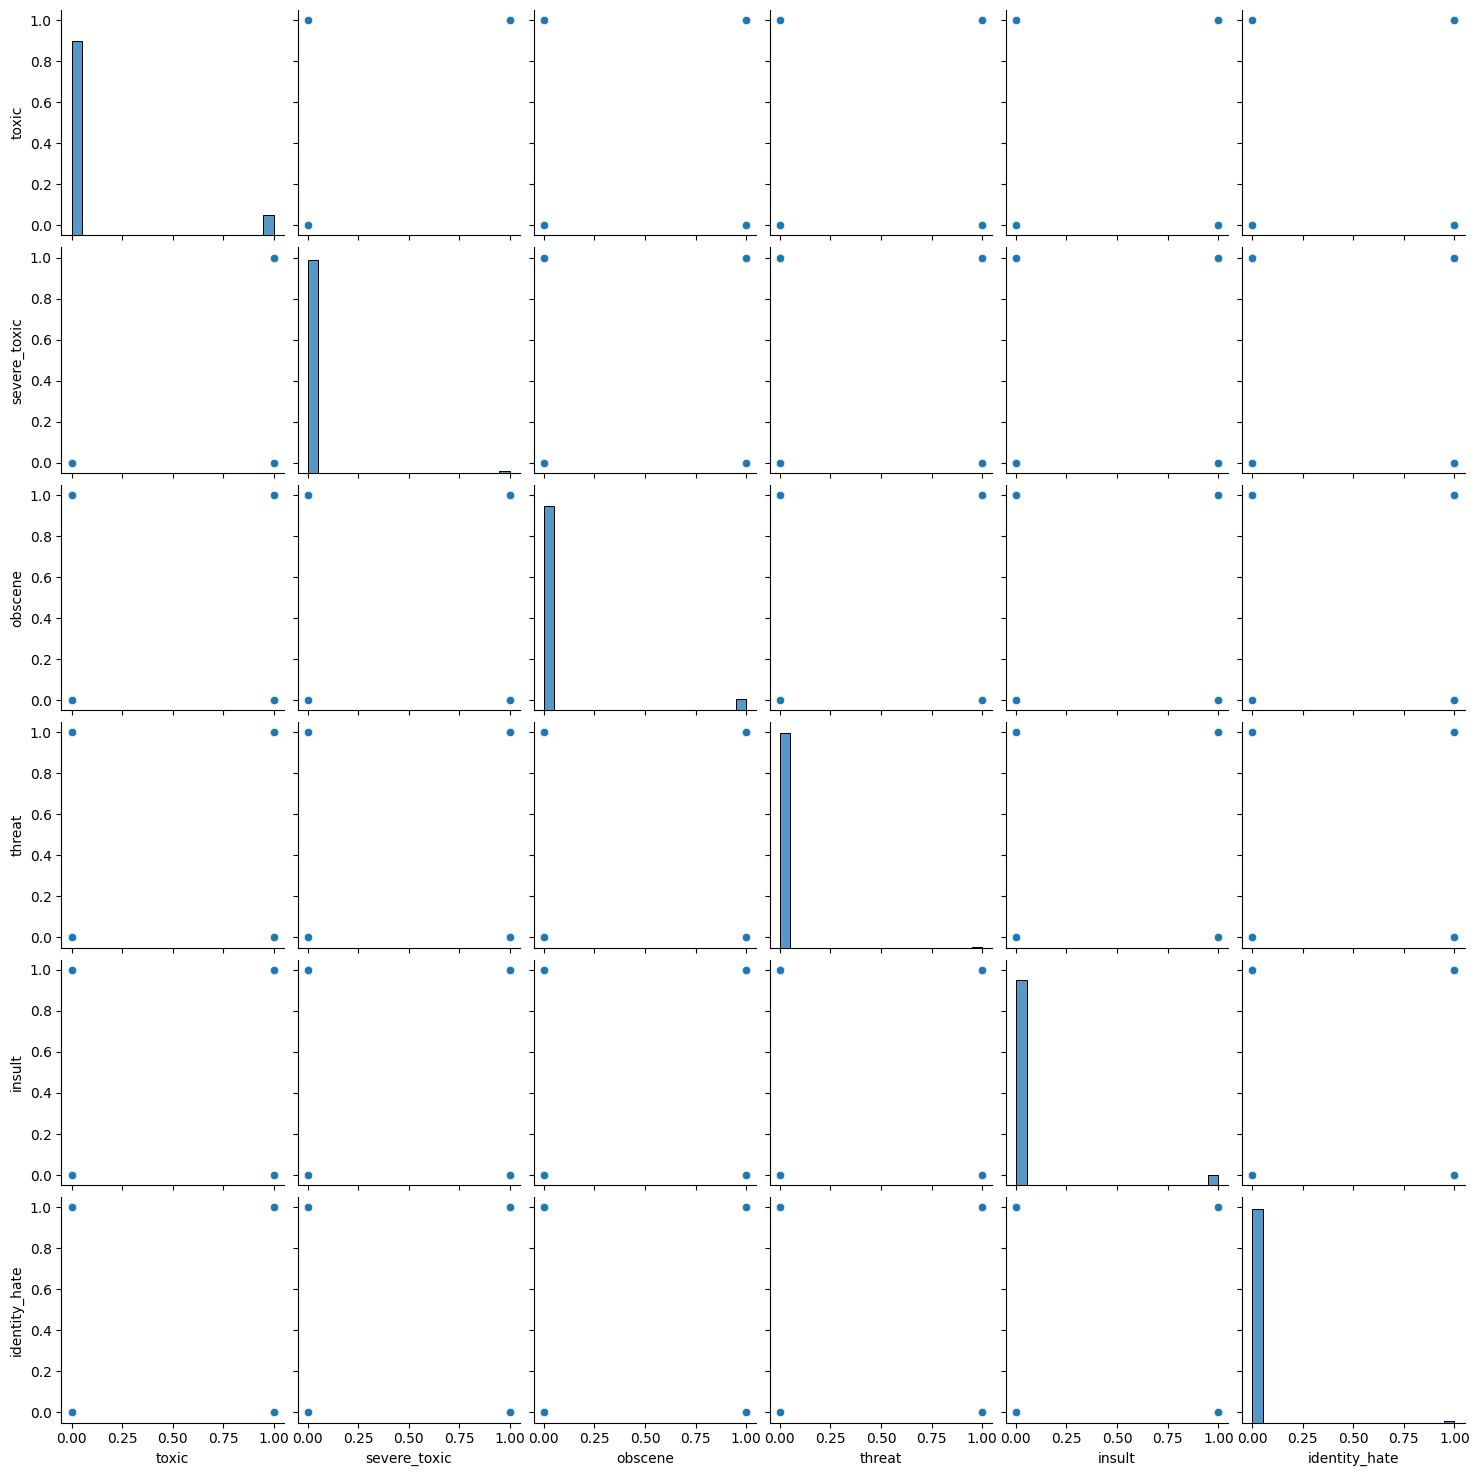

In [10]:
sns.pairplot(data_df_train)
plt.show()

In [11]:
report = ProfileReport(df=data_df_train, title='Toxic Comments', explorative=True)
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split



In [4]:
data_df_train = pd.read_csv('train.csv')
data_df_train.drop('id', axis=1, inplace=True)
data_df_train

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [5]:
data_df_train['combined_labels'] = data_df_train.iloc[:, 1:].apply(lambda row: ','.join(map(str, row)), axis=1)

label_counts = data_df_train['combined_labels'].value_counts()

valid_labels = label_counts[label_counts >= 2].index

data_df_train_filtered = data_df_train[data_df_train['combined_labels'].isin(valid_labels)]

(159571, 8)
(159569, 8)


In [6]:
train, test = train_test_split(data_df_train_filtered, test_size=0.2, random_state=42, stratify=data_df_train_filtered.combined_labels)

print(train.shape, test.shape)

(127655, 8) (31914, 8)


In [190]:
tfidf = TfidfVectorizer(max_features=100000).fit(data_df_train_filtered.comment_text)
len(tfidf.vocabulary_)

100000

In [191]:
X_train = tfidf.transform(train.comment_text)
print('X_train shape: %s' % (X_train.shape,))

X_test = tfidf.transform(test.comment_text)
print('X_test shape: %s' % (X_test.shape,))

X_train shape: (127655, 100000)
X_test shape: (31914, 100000)


In [192]:
label_encoder = LabelEncoder()

label_encoder.fit(data_df_train_filtered['combined_labels'])

LabelEncoder()

In [193]:
label_encoder.classes_

array(['0,0,0,0,0,0', '0,0,0,0,0,1', '0,0,0,0,1,0', '0,0,0,0,1,1',
       '0,0,0,1,0,0', '0,0,0,1,1,0', '0,0,1,0,0,0', '0,0,1,0,0,1',
       '0,0,1,0,1,0', '0,0,1,0,1,1', '0,0,1,1,0,0', '0,0,1,1,1,0',
       '1,0,0,0,0,0', '1,0,0,0,0,1', '1,0,0,0,1,0', '1,0,0,0,1,1',
       '1,0,0,1,0,0', '1,0,0,1,0,1', '1,0,0,1,1,0', '1,0,0,1,1,1',
       '1,0,1,0,0,0', '1,0,1,0,0,1', '1,0,1,0,1,0', '1,0,1,0,1,1',
       '1,0,1,1,0,0', '1,0,1,1,1,0', '1,0,1,1,1,1', '1,1,0,0,0,0',
       '1,1,0,0,0,1', '1,1,0,0,1,0', '1,1,0,0,1,1', '1,1,0,1,0,0',
       '1,1,1,0,0,0', '1,1,1,0,0,1', '1,1,1,0,1,0', '1,1,1,0,1,1',
       '1,1,1,1,0,0', '1,1,1,1,1,0', '1,1,1,1,1,1'], dtype=object)

In [194]:
Y_train = label_encoder.transform(train.combined_labels).reshape(-1, 1)
print('Y_train shape: %s' % (Y_train.shape,))

Y_test = label_encoder.transform(test.combined_labels).reshape(-1, 1)
print('Y_test shape: %s' % (Y_test.shape,))

Y_train shape: (127655, 1)
Y_test shape: (31914, 1)


In [195]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train, Y_train)

c:\Users\Артем\vscode_source\MLIntro\LinearRegression\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [196]:
from sklearn.metrics import classification_report

print(classification_report(Y_train, clf.predict(X_train), target_names=label_encoder.classes_))

              precision    recall  f1-score   support

 0,0,0,0,0,0       0.90      1.00      0.95    114677
 0,0,0,0,0,1       0.00      0.00      0.00        43
 0,0,0,0,1,0       0.00      0.00      0.00       241
 0,0,0,0,1,1       0.00      0.00      0.00        22
 0,0,0,1,0,0       0.00      0.00      0.00        18
 0,0,0,1,1,0       0.00      0.00      0.00         2
 0,0,1,0,0,0       0.00      0.00      0.00       254
 0,0,1,0,0,1       0.00      0.00      0.00         2
 0,0,1,0,1,0       0.00      0.00      0.00       145
 0,0,1,0,1,1       0.00      0.00      0.00        14
 0,0,1,1,0,0       0.00      0.00      0.00         2
 0,0,1,1,1,0       0.00      0.00      0.00         2
 1,0,0,0,0,0       0.21      0.00      0.00      4533
 1,0,0,0,0,1       0.00      0.00      0.00       109
 1,0,0,0,1,0       0.00      0.00      0.00       972
 1,0,0,0,1,1       0.00      0.00      0.00       107
 1,0,0,1,0,0       0.00      0.00      0.00        90
 1,0,0,1,0,1       0.00    

c:\Users\Артем\vscode_source\MLIntro\LinearRegression\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Артем\vscode_source\MLIntro\LinearRegression\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Артем\vscode_source\MLIntro\LinearRegression\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [198]:
print(classification_report(Y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     28669
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        60
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        63
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         4
          12       0.00      0.00      0.00      1133
          13       0.00      0.00      0.00        27
          14       0.00      0.00      0.00       243
          15       0.00      0.00      0.00        27
          16       0.00      0.00      0.00        23
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         3
          19       0.00    

c:\Users\Артем\vscode_source\MLIntro\LinearRegression\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Артем\vscode_source\MLIntro\LinearRegression\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Артем\vscode_source\MLIntro\LinearRegression\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf